# Module 7 Project
Author: [Julia Fangman](https://github.com/juliafangman)
Repository: [datafun-07-ml-predictive](https://github.com/juliafangman/datafun-07-ml-predictive)

# Part 1 - Linear Regression

In [64]:
import matplotlib
import seaborn as sns
import pandas as pd

#### Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using the following formula:

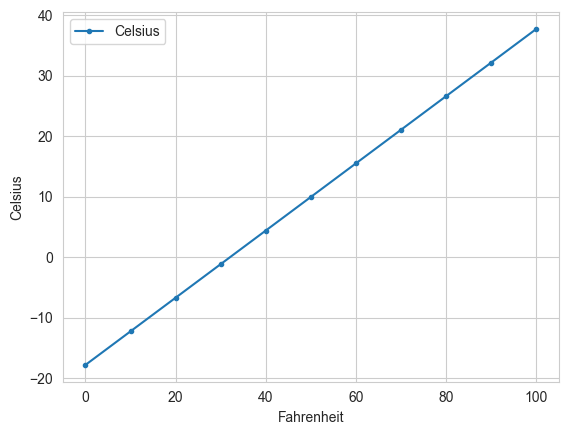

In [65]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Section 1 - Load

In [79]:
pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
...,...,...,...
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4


## Section 2 - View

In [80]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
print(nyc.head())
print(nyc.tail())


     Date  Value  Anomaly
0  189501   34.2     -3.2
1  189601   34.7     -2.7
2  189701   35.5     -1.9
3  189801   39.6      2.2
4  189901   36.4     -1.0
       Date  Value  Anomaly
119  201401   35.5     -1.9
120  201501   36.1     -1.3
121  201601   40.8      3.4
122  201701   42.8      5.4
123  201801   38.7      1.3


## Section 3 - Clean


In [81]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

nyc.Date.dtype

nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Section 4 - Describe

In [84]:
pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 - Calculate Line

In [85]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

linear_regression.slope
print(linear_regression.slope)
linear_regression.intercept 
print(linear_regression.intercept)

0.014771361132966163
8.694993233674289


## Section 6 - Predict

In [86]:
print(linear_regression.slope * 2019 + linear_regression.intercept)
print(linear_regression.slope * 1890 + linear_regression.intercept)

38.51837136113297
36.612865774980335


## Section 7 - Plot

(10.0, 70.0)

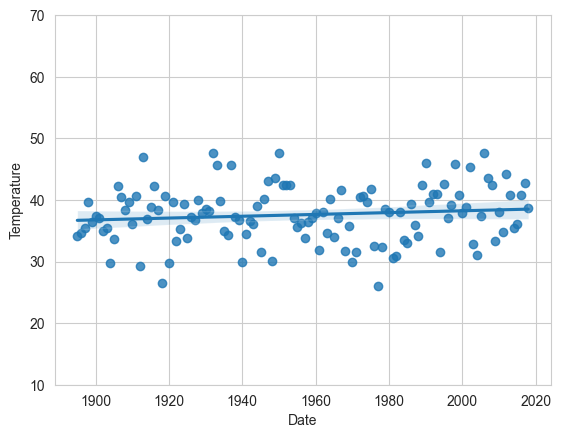

In [87]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

axes.set_ylim(10, 70) 

# Part 2 - Machine Learning

## Loading the Average High Temperatures into a DataFrame

In [88]:
import pandas as pd
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Splitting the Data for Training & Testing

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

print(X_train.shape)

print(X_test.shape)

(93, 1)
(31, 1)


## Training the Model

In [90]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [30]:
print(linear_regression.coef_)
print(linear_regression.intercept_)

[0.01939167]
-0.30779820252656265


## Testing the Model

In [34]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')


predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Predicting Future Temperatures & Estimating Past Temperatures

In [37]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [38]:
predict(1890)

array([36.34246432])

## Visualizing the Dataset with the Regression Line

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


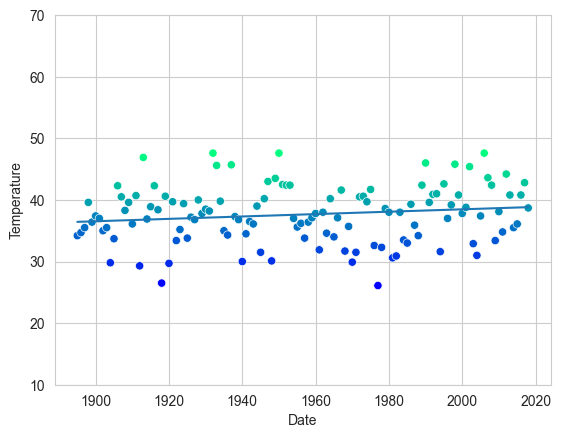

In [91]:
import seaborn as sns
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70) 
import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x) 

import matplotlib.pyplot as plt

line = plt.plot(x, y)